In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Carregar dataset
df = pd.read_csv('supermarket_sales.csv')

# Exibir as 5 primeiras linhas
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
# Informações do dataset
df.info()

# Verificar colunas e valores nulos
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
# Converter a coluna 'Date' para tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Criar coluna 'Mês-Ano' para análise mensal
df['Mes_Ano'] = df['Date'].dt.to_period('M')

# Visualizar novamente
df[['Date', 'Mes_Ano']].head()


,Date,Mes_Ano
0,2019-01-05,2019-01
1,2019-03-08,2019-03
2,2019-03-03,2019-03
3,2019-01-27,2019-01
4,2019-02-08,2019-02


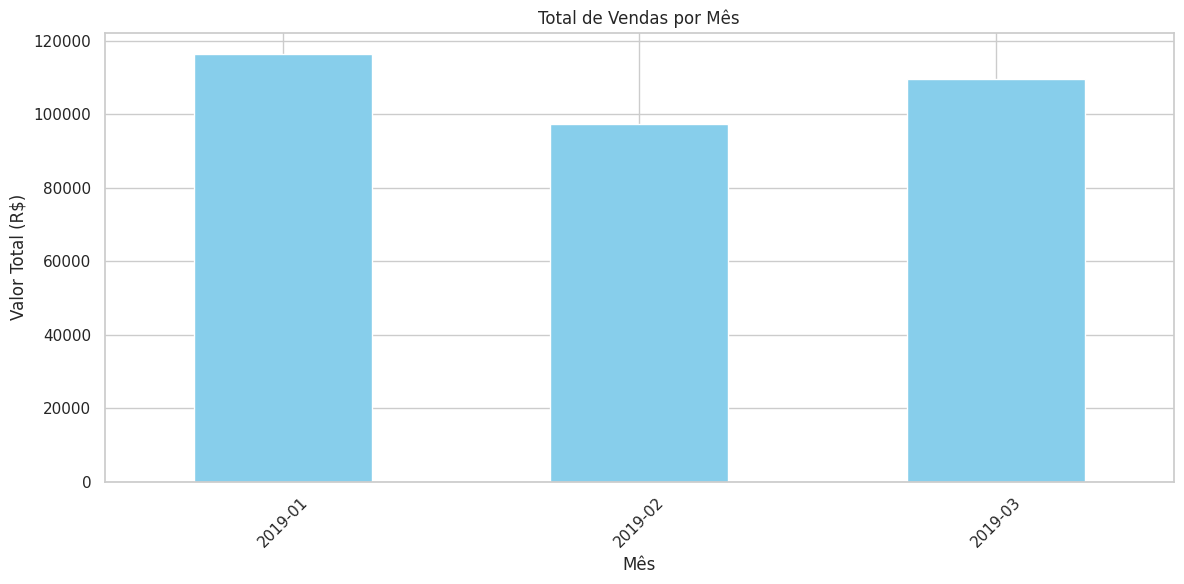

In [8]:
# Agrupar por mês e somar o total de vendas
vendas_mensais = df.groupby('Mes_Ano')['Total'].sum()

# Plotar gráfico
vendas_mensais.plot(kind='bar', color='skyblue')
plt.title('Total de Vendas por Mês')
plt.ylabel('Valor Total (R$)')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


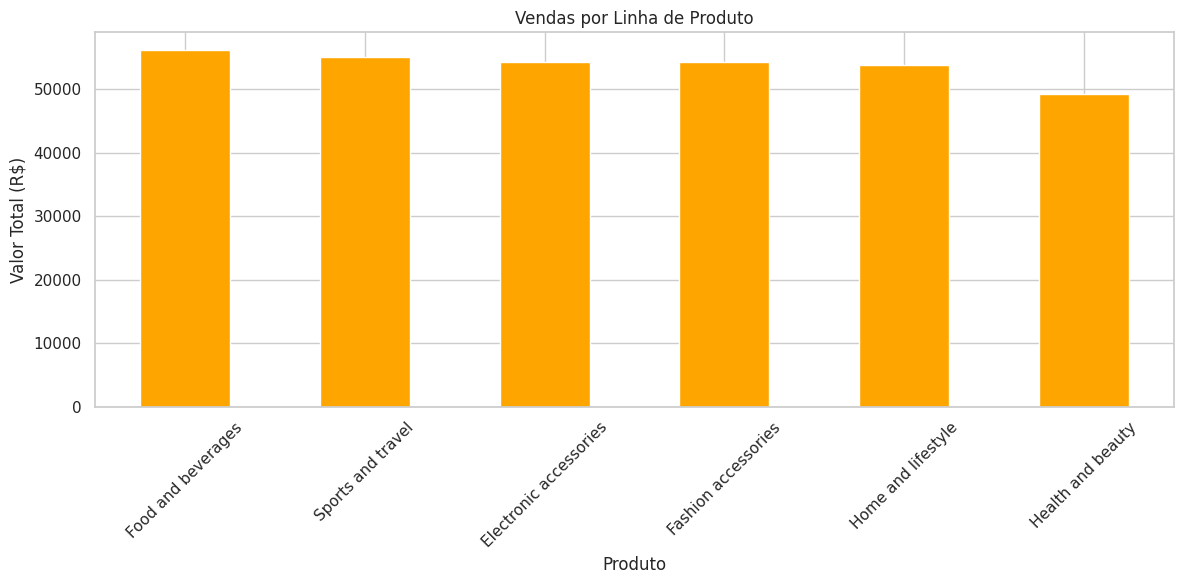

In [9]:
mais_vendidos = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# Plotar gráfico
mais_vendidos.plot(kind='bar', color='orange')
plt.title('Vendas por Linha de Produto')
plt.ylabel('Valor Total (R$)')
plt.xlabel('Produto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


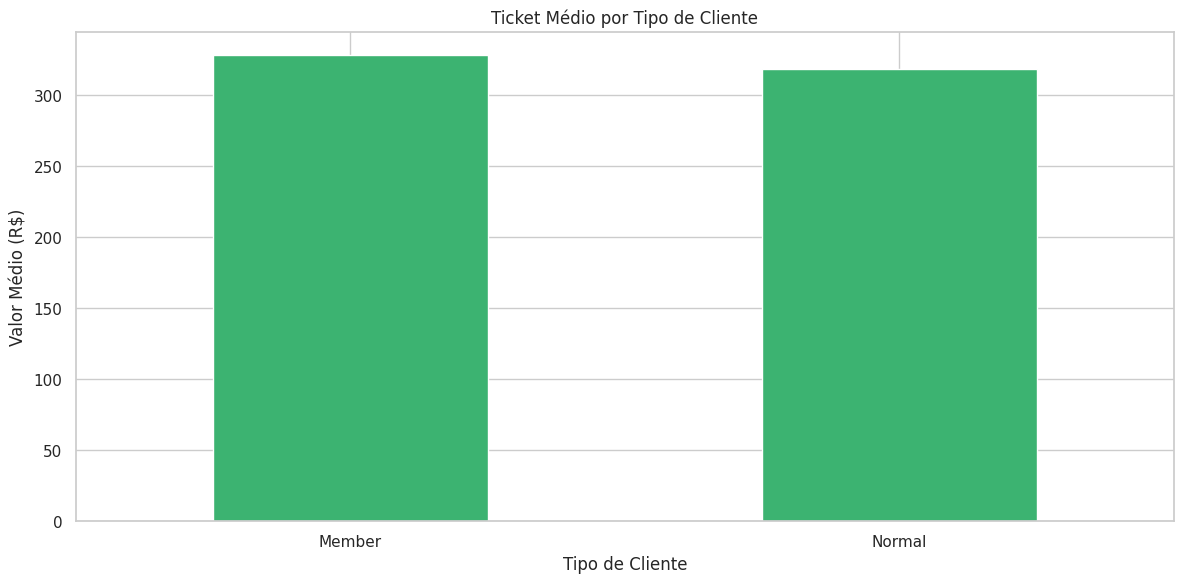

In [10]:
ticket_medio = df.groupby('Customer type')['Total'].mean()

ticket_medio.plot(kind='bar', color='mediumseagreen')
plt.title('Ticket Médio por Tipo de Cliente')
plt.ylabel('Valor Médio (R$)')
plt.xlabel('Tipo de Cliente')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


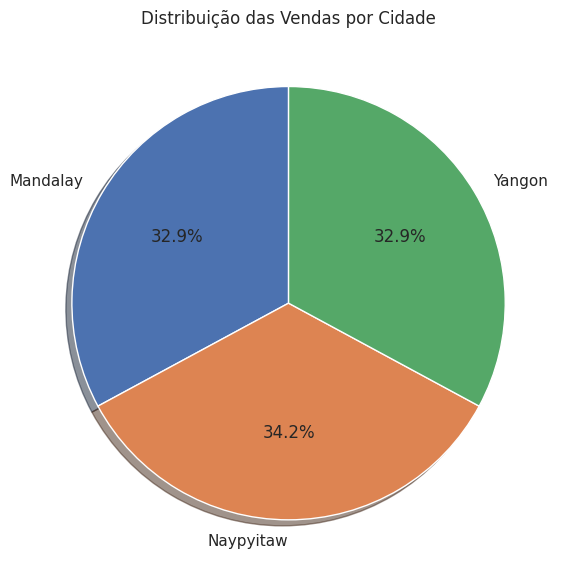

In [11]:
vendas_por_cidade = df.groupby('City')['Total'].sum()

vendas_por_cidade.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribuição das Vendas por Cidade')
plt.ylabel('')
plt.tight_layout()
plt.show()


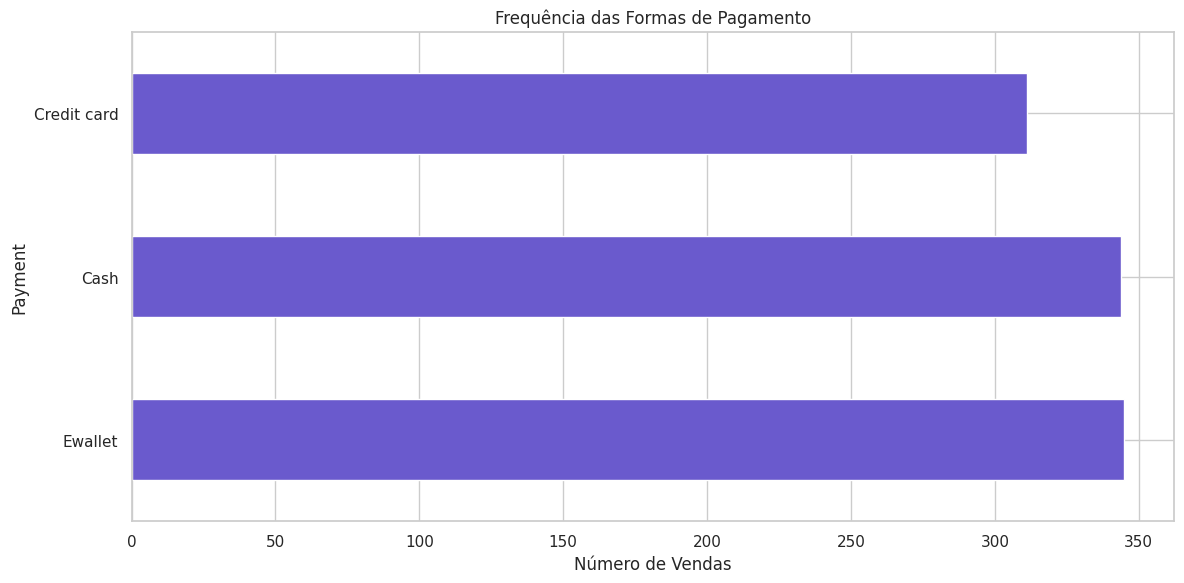

In [12]:
pagamento = df['Payment'].value_counts()

pagamento.plot(kind='barh', color='slateblue')
plt.title('Frequência das Formas de Pagamento')
plt.xlabel('Número de Vendas')
plt.tight_layout()
plt.show()


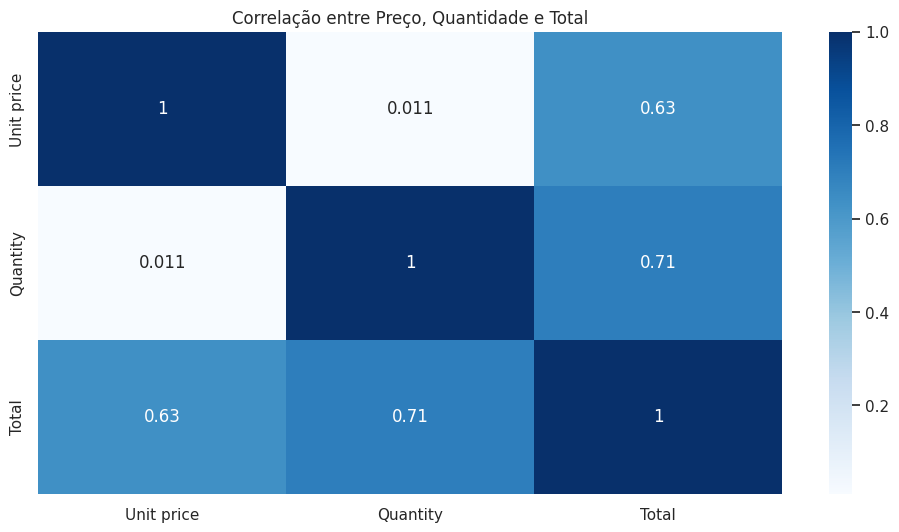

In [13]:
sns.heatmap(df[['Unit price', 'Quantity', 'Total']].corr(), annot=True, cmap='Blues')
plt.title('Correlação entre Preço, Quantidade e Total')
plt.show()
